In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
from Funcoes import *
import pickle

In [2]:
%matplotlib inline

In [3]:
plt.rcParams['font.size'] = 18
plt.rcParams['figure.figsize'] = [16, 8]
plt.rcParams['lines.linewidth'] = 2

In [4]:
resultados = dict()
for amostras in [2**x for x in range(8,11)]:
    print(f'{"#"*20} {amostras} Amostras {"#"*20}')
    M = 16        # ordem da modulação
    Fb = 40e9      # taxa de símbolos
    SpS = 4         # amostras por símbolo
    Fs = SpS*Fb    # taxa de amostragem
    SNR = 40        # relação sinal ruído (dB)
    rolloff = 0.01  # Rolloff do filtro formatador de pulso
    sfm, A = sinal_qam_fase_min(M,Fb,SpS,SNR)
    #amostras = 128
    dataset , X , y = dataset_02(sfm,amostras)

    X_train = X[:50000]
    X_test = X[50000:]

    y_train = y[:50000]
    y_test = y[50000:]
    scaler = MinMaxScaler()

    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    stop = EarlyStopping(monitor='val_loss', patience=5)
    model = Sequential()
    model.add(Dense(128, activation='relu', input_shape=(amostras,)))
    model.add(Dense(128, activation='relu'))
    Dropout(0.5)

    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    model.fit(X_train, y_train, epochs=300, callbacks=[stop],
            validation_data=(X_test, y_test), batch_size=64,verbose=2)
    predicoes = model.predict(X_test)
    sinal_predito = (dataset['amplitudes'][50000:]*np.exp(1j*predicoes.reshape(-1,))).reshape(1,-1)
    sinal_predito_revertido = reverter_sinal_fase_min(sinal_predito ,A).reshape(1,-1)
    sinal_predito_filtrado = normcenter(lowpassFilter(sinal_predito_revertido, Fs, 1/Fb, 0.001, taps=4001))
    sinal_base_revertido = reverter_sinal_fase_min(sfm[:,50000:60001],A)
    teste = str(amostras) + ' Amostras'
    resultados[teste] = {'Sinais fase minima':(sfm[:,50000:60001], sinal_predito),
                         'Sinais revertidos':(sinal_base_revertido,sinal_predito_revertido),
                         'Sinal predito filtrado':(sinal_predito_filtrado)}
    print('\n\n')
print(' FIM ')

#################### 256 Amostras ####################
Train on 50000 samples, validate on 10000 samples
Epoch 1/300
50000/50000 - 9s - loss: 0.0279 - val_loss: 0.0049
Epoch 2/300
50000/50000 - 6s - loss: 0.0051 - val_loss: 0.0037
Epoch 3/300
50000/50000 - 6s - loss: 0.0045 - val_loss: 0.0115
Epoch 4/300
50000/50000 - 6s - loss: 0.0038 - val_loss: 0.0025
Epoch 5/300
50000/50000 - 6s - loss: 0.0025 - val_loss: 0.0016
Epoch 6/300
50000/50000 - 7s - loss: 0.0019 - val_loss: 0.0012
Epoch 7/300
50000/50000 - 7s - loss: 0.0016 - val_loss: 0.0010
Epoch 8/300
50000/50000 - 6s - loss: 0.0015 - val_loss: 0.0028
Epoch 9/300
50000/50000 - 6s - loss: 0.0014 - val_loss: 0.0018
Epoch 10/300
50000/50000 - 7s - loss: 0.0013 - val_loss: 8.9420e-04
Epoch 11/300
50000/50000 - 7s - loss: 0.0012 - val_loss: 8.1617e-04
Epoch 12/300
50000/50000 - 6s - loss: 0.0012 - val_loss: 8.1522e-04
Epoch 13/300
50000/50000 - 7s - loss: 0.0012 - val_loss: 0.0011
Epoch 14/300
50000/50000 - 6s - loss: 9.7800e-04 - val_loss:

In [5]:
# nome_arquivo = 'Result_dif_num_amostras.pkl'
# arquivo = open(nome_arquivo,'wb')
# pickle.dump(resultados,arquivo)
# arquivo.close()

In [9]:
resultados['256 Amostras'].keys()

dict_keys(['Sinais fase minima', 'Sinais revertidos', 'Sinal predito filtrado'])

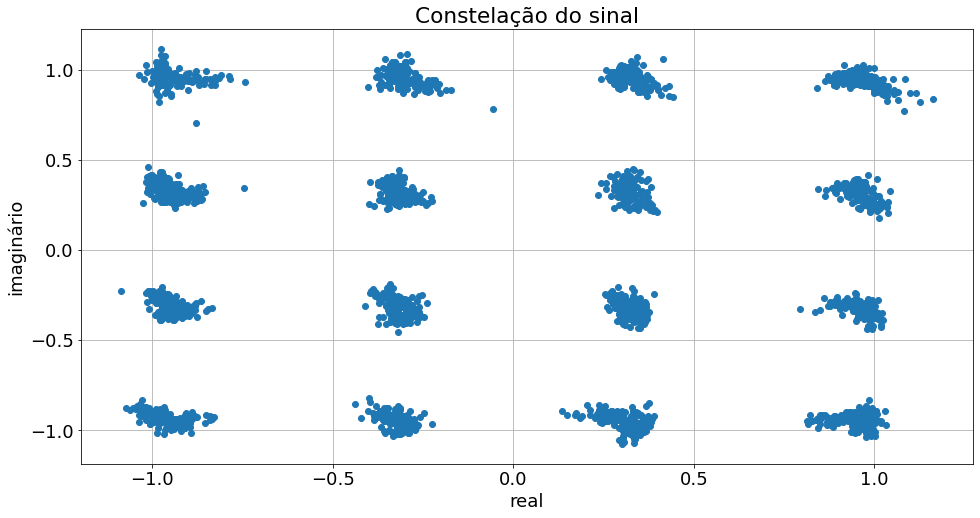

In [19]:
plot_constelação(resultados['256 Amostras']['Sinal predito filtrado'][:,::4])

(0.0, 4.5)

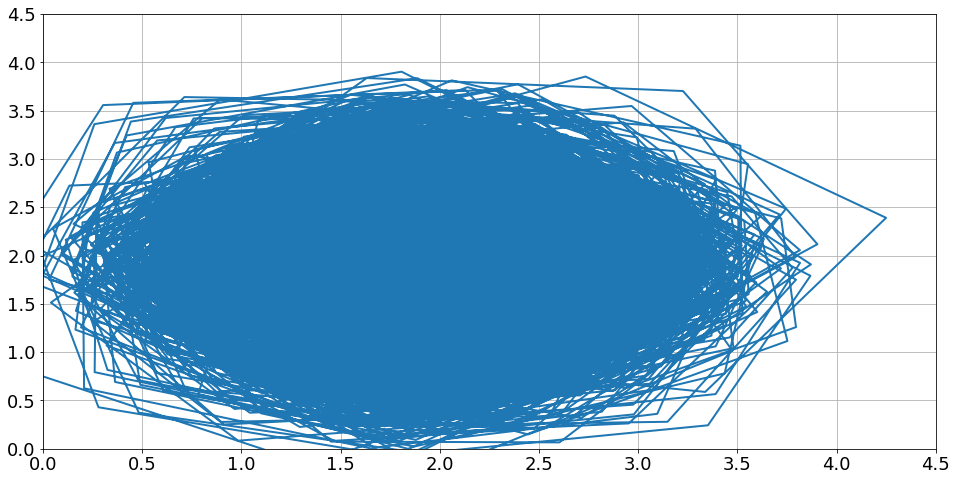

In [14]:
plt.plot(resultados['256 Amostras']['Sinais fase minima'][0][0,::].real,resultados['256 Amostras']['Sinais fase minima'][0][0,::].imag)
plt.grid(True)
plt.xlim([0,4.5])
plt.ylim([0,4.5])

AttributeError: 'ResourceVariable' object has no attribute 'ndim'

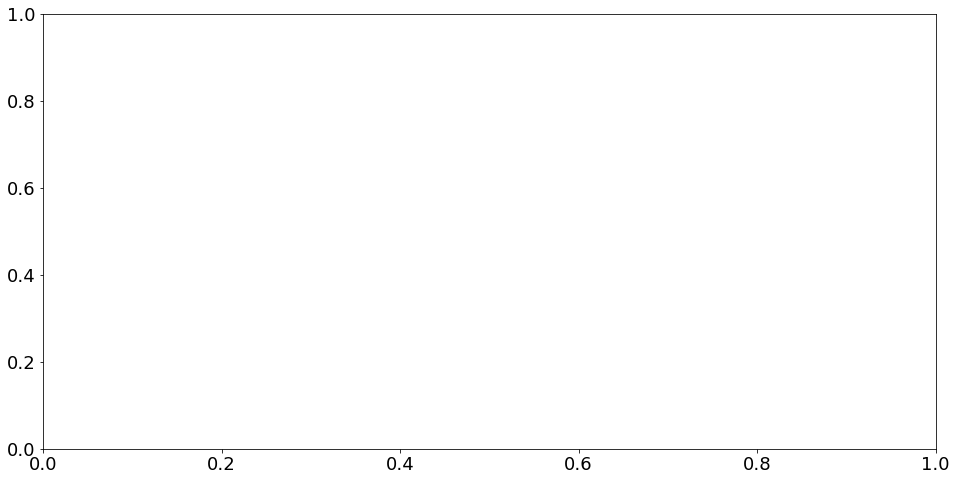

In [22]:
plt.plot(model.weights[4])

In [29]:
model.weights[4].

array(<tf.Variable 'dense_8/kernel:0' shape=(128, 1) dtype=float32, numpy=
array([[ 0.04523595],
       [ 0.01035586],
       [ 0.19744977],
       [ 0.01061769],
       [ 0.01951986],
       [-0.18177705],
       [ 0.03615902],
       [-0.00123513],
       [ 0.16693024],
       [ 0.0022226 ],
       [-0.02670466],
       [-0.02801931],
       [-0.13650844],
       [ 0.11910645],
       [ 0.15636274],
       [ 0.06952778],
       [-0.13844301],
       [-0.08454252],
       [-0.08276106],
       [-0.04935183],
       [ 0.14217767],
       [-0.13361542],
       [ 0.05051993],
       [-0.07536574],
       [-0.01664114],
       [ 0.1819163 ],
       [-0.01183668],
       [-0.14041327],
       [-0.07647061],
       [-0.08386492],
       [-0.17014413],
       [ 0.19315499],
       [ 0.10817424],
       [ 0.05788005],
       [-0.15666394],
       [-0.17249094],
       [-0.14878984],
       [ 0.14057314],
       [-0.03019509],
       [-0.09521917],
       [-0.11492201],
       [ 0.09769975],
 